Primeros 20 coeficientes: [0.0, 1.5, -0.0, -0.875, -0.0, 0.6875, 0.0, -0.585937, -0.0, 0.519531, 0.0, -0.47168, 0.0, 0.435059, 0.0, -0.405853, 0.0, 0.381851, 0.0, -0.361668]
Combinación lineal: -287157.528947354*x*(0.084908503549925*x**18 - 0.416090051341461*x**16 + 0.866666760645232*x**14 - 1.0*x**12 + 0.698347026370561*x**10 - 0.302867312528384*x**8 + 0.0805656799877756*x**6 - 0.0125324378390077*x**4 + 0.00104436970774894*x**2 - 4.54073714774079e-5)


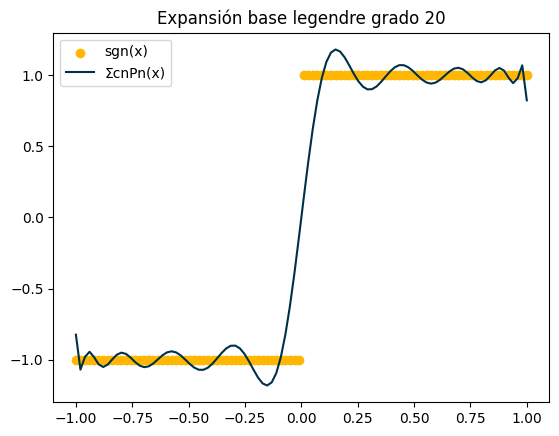

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import sympy as sp
import math

#(b) Implemente la función sgn(x).
def sgn(x):
    if x > 0:
        return 1
    elif x == 0:
        return 0
    else:
        return -1
    
#(c) Vectorice y dibuje la función (plot al final).
sgn_vectorized = np.vectorize(sgn)
X = np.linspace(-1, 1, 100)
Y = sgn_vectorized(X)


#(d) Defina los puntos y los pesos de Gauss-Legendre al grado n = 15.
roots, weights = np.polynomial.legendre.leggauss(15)

#(e) Cree y guarde los polinomios de Legendre al grado N = 20
def polinomio_n(n):
    x = sp.Symbol("x")
    f1 = (x ** 2 - 1) ** n
    c = 1 / (2 ** n * math.factorial(n))
    df1 = sp.diff(f1, x, n)
    f = sp.simplify(c * df1)
    
    def evaluar(xi):
        return float(f.subs("x", xi).evalf())
    
    return evaluar, f

def primeros_n_polinomios(n):
    poly = []
    for i in range(n):
        poly.append(polinomio_n(i)[1])
    return poly

#(f) Cree una función que calcule los N + 1 coeficientes en un array de numpy.
def coeficiente(f, Weights, Roots, n):
    p_eval = polinomio_n(n)[0]
    
    t1 = 0.5*(Roots + 1)
    t2 = 0.5*(Roots - 1)
    
    a1 = np.array([f(x) for x in t1])
    b1 = np.array([p_eval(x) for x in t1])
    
    a2 = np.array([f(x) for x in t2])
    b2 = np.array([p_eval(x) for x in t2])
    
    integral0_1 = 0.5*np.sum(Weights * a1 * b1)
    integral1_0 = 0.5*np.sum(Weights * a2 * b2)
    
    return (n+0.5)*(integral0_1 + integral1_0)

def primeros_n_coeficientes(f, Weights, Roots, n):
    coeff = np.array([])
    for i in range(n):
        coeff = np.append(coeff,(coeficiente(f, Weights, Roots, i)))

    return np.round(coeff,6).tolist()

#(g) Calcule la combinación lineal (Ecuación (4.193)) para cada 
#valor del dominio que uso para dibujar la función original.

def comb_lineal(f,n,roots,weights):
    p = 0
    coeficientes = primeros_n_coeficientes(f,weights,roots,20)
    polinomios = primeros_n_polinomios(20)
    
    for i in range(n):
       p += coeficientes[i] * polinomios[i]
       
    return p


#(h) Dibuje la representación en la base de Legendre para obtener:

fig, ax = plt.subplots()
print("Primeros 20 coeficientes:",list(primeros_n_coeficientes(sgn,weights,roots,20)))
print("Combinación lineal:",sp.factor(comb_lineal(sgn,20,roots,weights)))
f_num = sp.lambdify(sp.Symbol("x"),comb_lineal(sgn,20,roots,weights),"numpy")
Y2 = f_num(X)
ax.scatter(X, Y,label="sgn(x)",color="#ffb703")
ax.plot(X,Y2,color="#003049",label="ΣcnPn(x)")
ax.set_title("Expansión base legendre grado 20")
plt.legend()
plt.show()